## Introduction

- Alifina Aulia Azzahra
- Wanwha Sonia Putri A. S.

## Project Overview

Pada saat ini, persaingan antar bank semakin tinggi membuat setiap perusahaan harus menyiapkan strategi pemasaran produk perbankannya dengan matang. Segmentasi pasar termasuk salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. Strategi pemasaran yang tepat dengan menetapkan segmentasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

Dataset yang digunakan adalah Credit Card Dataset yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut, yaitu :
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

## Import Library

In [369]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import pickle

## Data Loading

In [370]:
data = pd.read_csv("CC GENERAL.csv")

In [371]:
pd.set_option("display.max_columns", None)

In [372]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [373]:
data.shape

(8950, 18)

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [375]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [376]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [377]:
data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

## Data Cleaning

Melakukan pengecekan apakah terdapat missing value, data yang duplikat, tipe data yang kurang tepat, dan data yang null.

In [378]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terlihat bahwa terdapat missing value pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS. Karena pada kolom CREDIT_LIMIT hanya terdapat satu missing value, sehingga dapat dihapus saja. Sedangkan untuk missing value pada kolom MINIMUM_PAYMENTS akan diisi dengan nilai mediannya.

In [379]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [380]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Karena sudah tidak terdapat missing value, maka akan dicek apakah terdapat data yang duplikat pada dataset.

In [381]:
data.duplicated().sum()

0

Didapatkan jika tidak terdapat data yang duplikat. Akan dilakukan penghapusan pada kolom CUST_ID karena kolom tersebut berisi identitas untuk pemegang kartu kredit yang tidak dibutuhkan dalam analisis data.

In [382]:
data = data.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploration Data Analysis

In [383]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Menentukan pembayaran minimal dan maksimal pada jangka waktu layanan kartu kredit pengguna selama 12 bulan

In [384]:
data.loc[data['TENURE'] == 12, 'PURCHASES'].agg(('min', 'max'))

min        0.00
max    49039.57
Name: PURCHASES, dtype: float64

Dari hasil tersebut diketahui bahwa dalam jangka waktu layanan kartu kredit pengguna selama 12 bulan memiliki pembayaran minimal 0 dan pembayaran maksimal sebesar 49039.57 atau sekitar 49039.

### Persebaran data pada kolom TENURE

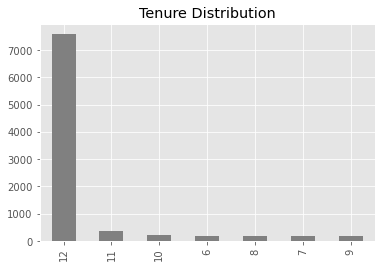

In [385]:
data['TENURE'].value_counts().plot.bar(color='grey')
plt.title('Tenure Distribution')
plt.show()

Didapatkan bahwa pengguna lebih banyak memilih melakukan pembayaran layanan kartu kredit (tenure) selama 12 bulan dibandingkan yang lainnya.

### Melihat korelasi antara Credit Limit dengan Balance

Text(0.5, 1.0, 'Credit Limit vs Balance')

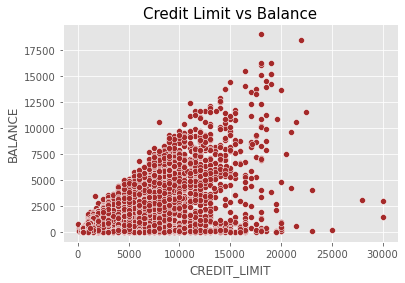

In [386]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=data, color='brown')
plt.title("Credit Limit vs Balance", fontsize= 15)

Scatter plot di atas menunjukkan bahwa saat nilai variabel meningkat, varians distribusi juga ikut meningkat hingga membentuk seperti kerucut. Oleh karenanya, didapatkan bahwa terdapat korelasi positif antara CREDIT LIMIT dengan BALANCE.

### Distribusi Banyaknya Pembelian yang Dilakukan oleh Pengguna Berdasarkan Tenure

In [387]:
eda = data[['PURCHASES', 'TENURE']]
eda = eda.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

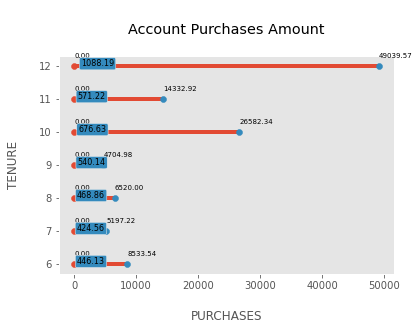

In [388]:
tenure = sorted(data['TENURE'].unique())
min_sct = plt.scatter(x=eda['MIN'], y=eda['TENURE'])
max_sct = plt.scatter(x=eda['MAX'], y=eda['TENURE'])
for i in range(len(tenure)):
    eda_x = eda[eda['TENURE']==tenure[i]]
    plt.hlines(y=eda_x['TENURE'], xmin=eda_x['MIN'], xmax=eda_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(eda_x['MIN'].values[0]), xy=(eda_x['MIN'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda_x['AVG'].values[0]), xy=(eda_x['AVG'].values[0], eda_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(eda_x['MAX'].values[0]), xy=(eda_x['MAX'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
#for spine in axs_left.spines.values():
#    spine.set_color('None')
plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nAccount Purchases Amount\n')
plt.show()

Berdasarkan chart di atas, didapatkan jika pengguna kartu kredit dengan jangka waktu pembayaran layanan kartu kredit (TENURE) selama 12 bulan lebih memilih untuk melakukan pembelian dalam jumlah besar dibandingkan dengan pengguna yang memiilih jangka angka waktu pembayaran layanan kartu kredit (TENURE) lainnya.

### Correlation Map

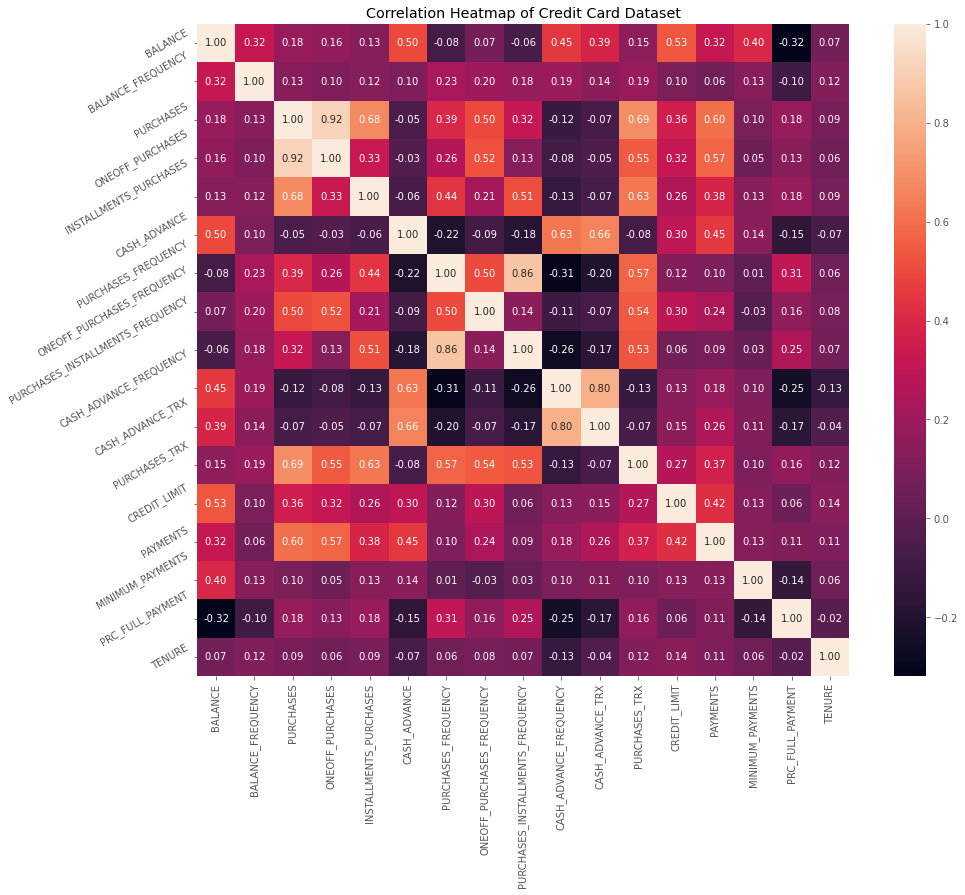

In [389]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Credit Card Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Dari diagram heatmap di atas, terlihat bahwa kolom INSTALLMENT PURCHASES memiliki korelasi yang tinggi dengan kolom PURCHASES, kolom CASH ADVANCE FREQUENCY memiliki korelasi yang tinggi dengan PURCHASES FREQUENCY, kolom CASH ADVANCE TRX memiliki korelasi yang tinggi dengan CASH ADVANCE TRX memiliki korelasi yang tinggi dengan PURCHASES TRX, dan seterusnya.

In [390]:
data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

## Data Preprocessing

In [391]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [392]:
# Standardize data
scaler = StandardScaler() 
data_train = scaler.fit_transform(data.values)
data_train.shape

(8949, 17)

In [393]:
# Statistics of scaled data
data_train = pd.DataFrame(data_train, columns=data.columns)
data_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541


In [394]:
# Melihat penggabungan cluster menggunakan Dendrogram
HC = linkage(data_train, method='ward')

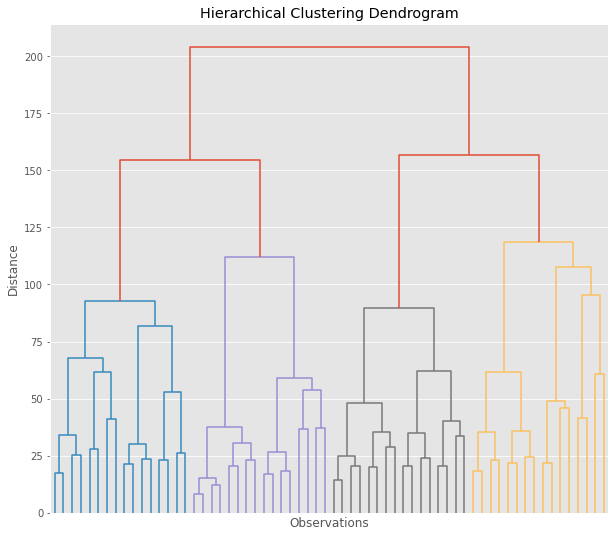

In [395]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(HC, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

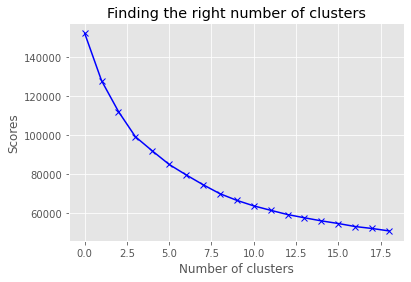

In [396]:
#mencari jumlah cluster yang optimal menggunakan elbow method
scores_1 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_train)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Scores') 
plt.show()

Text(0, 0.5, 'Distance')

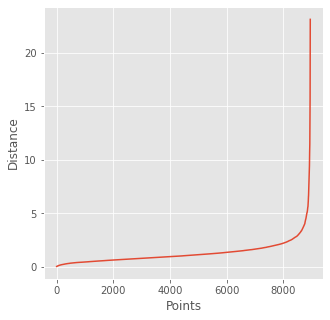

In [397]:
# mencari nilai epsilon untuk klasterisasi menggunakan DBScan
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=36)
neighbors = nearest_neighbors.fit(data_train)

distances, indices = neighbors.kneighbors(data_train)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [398]:
#!pip install --upgrade kneed

2.205317994585644


<Figure size 360x360 with 0 Axes>

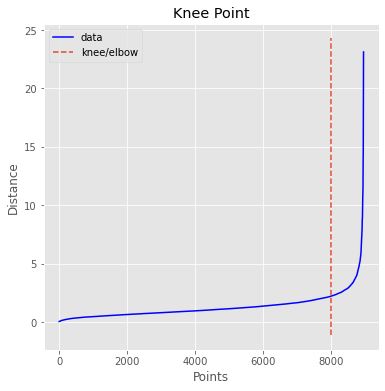

In [399]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

## Pendefinisian Model

In [400]:
X = data_train.values

### 1. KMeans Clustering

In [401]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [402]:
y_kmeans

array([1, 2, 4, ..., 0, 1, 1])

In [403]:
kmeans_data= data_train.copy()
kmeans_data['KMeansSegment']= kmeans.labels_

In [404]:
kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541,1
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541,2
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541,4
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541,1
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.341273,1.183844,-4.126919,0
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.228336,-0.525588,-4.126919,0
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.326899,0.329128,-4.126919,0
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.338328,0.329128,-4.126919,1


In [405]:
kmeans_data['Labels'] = kmeans_data['KMeansSegment'].map({0:'Middle Ground', 
                                                           1:'High Credit Frequent Purchasers', 
                                                           2:'High Cash Advance Users', 
                                                           3:'Frugal Credit Users',
                                                           4:'Very Frugal Credit Users'})
kmeans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541,1,High Credit Frequent Purchasers
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541,2,High Cash Advance Users
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541,4,Very Frugal Credit Users
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541,1,High Credit Frequent Purchasers
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541,1,High Credit Frequent Purchasers


### 2. DBSCAN Clustering

In [406]:
dbscan_cluster = DBSCAN(eps=2.205317994585644, min_samples=36)
y_dbscan= dbscan_cluster.fit(X)

In [407]:
dbscan_data= data_train.copy()
dbscan_data['DBSCANSegemnt']= dbscan_cluster.labels_

In [408]:
dbscan_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCANSegemnt
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541,0


In [409]:
dbscan_data['DBSCANSegemnt'].unique()

array([ 0, -1], dtype=int64)

In [410]:
from collections import Counter

In [411]:
Counter(dbscan_data['DBSCANSegemnt'])

Counter({0: 8165, -1: 784})

## Model Evaluation

In [412]:
kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541,1,High Credit Frequent Purchasers
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541,2,High Cash Advance Users
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541,4,Very Frugal Credit Users
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541,1,High Credit Frequent Purchasers
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541,1,High Credit Frequent Purchasers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.341273,1.183844,-4.126919,0,Middle Ground
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.228336,-0.525588,-4.126919,0,Middle Ground
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.326899,0.329128,-4.126919,0,Middle Ground
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.338328,0.329128,-4.126919,1,High Credit Frequent Purchasers


In [413]:
dbscan_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCANSegemnt
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.341273,1.183844,-4.126919,0
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.228336,-0.525588,-4.126919,0
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.326899,0.329128,-4.126919,0
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.338328,0.329128,-4.126919,0


In [414]:
pca = PCA(n_components=2)
PrincipalComponents = pca.fit_transform(data_train)
PrincipalComponents

array([[-1.68376739, -1.0725471 ],
       [-1.13484609,  2.50877856],
       [ 0.96906683, -0.38352635],
       ...,
       [-0.92848132, -1.80769929],
       [-2.33744211, -0.6533987 ],
       [-0.55757792, -0.40030415]])

In [415]:
data_pca=pd.DataFrame(data=PrincipalComponents, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.683767,-1.072547
1,-1.134846,2.508779
2,0.969067,-0.383526
3,-0.888430,0.004355
4,-1.600259,-0.684011


In [416]:
data_pca = pd.concat([data_pca,kmeans_data.KMeansSegment], axis = 1)
data_pca.head(10)

,pca1,pca2,KMeansSegment
0,-1.683767,-1.072547,1
1,-1.134846,2.508779,2
2,0.969067,-0.383526,4
3,-0.888430,0.004355,1
4,-1.600259,-0.684011,1
5,0.252683,-0.776438,0
6,6.349905,-0.703520,4
7,0.275841,-1.288243,0
8,-0.442458,-0.459592,1
9,-0.563952,-0.366969,1


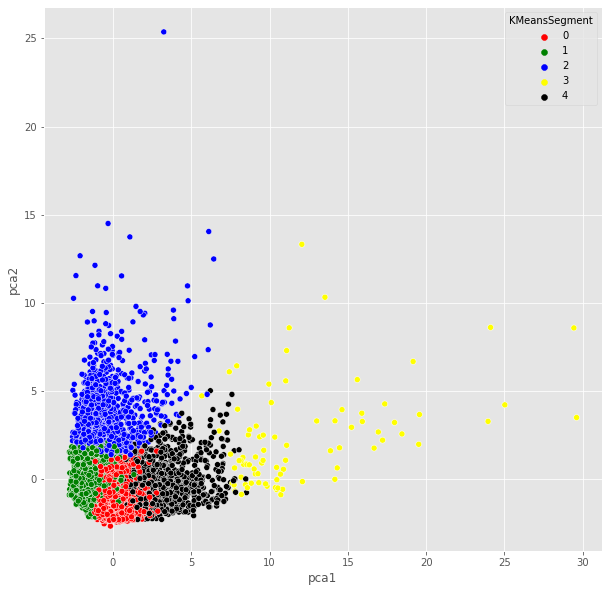

In [417]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "KMeansSegment", data = data_pca, palette =['red','green','blue','yellow','black'])
plt.show()

In [418]:
pcadbscan = PCA(n_components=2)
PrincipalComponentsdbscan = pcadbscan.fit_transform(data_train)
PrincipalComponentsdbscan

array([[-1.68376606, -1.072565  ],
       [-1.13484699,  2.50873246],
       [ 0.96905493, -0.38350353],
       ...,
       [-0.92847903, -1.80771576],
       [-2.33743934, -0.65343477],
       [-0.55758344, -0.40029211]])

In [419]:
data_pca=pd.DataFrame(data=PrincipalComponentsdbscan, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.683766,-1.072565
1,-1.134847,2.508732
2,0.969055,-0.383504
3,-0.888421,0.004396
4,-1.600261,-0.684047


In [420]:
data_pcadbscan = pd.concat([data_pca,dbscan_data.DBSCANSegemnt], axis = 1)
data_pcadbscan.head(10)

,pca1,pca2,DBSCANSegemnt
0,-1.683766,-1.072565,0
1,-1.134847,2.508732,0
2,0.969055,-0.383504,0
3,-0.888421,0.004396,0
4,-1.600261,-0.684047,0
5,0.252675,-0.776417,0
6,6.349929,-0.703483,-1
7,0.275836,-1.288234,0
8,-0.442442,-0.459571,0
9,-0.563924,-0.366912,0


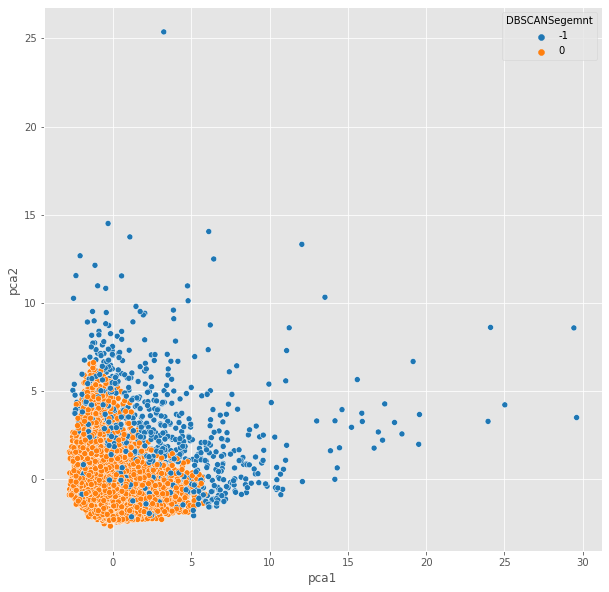

In [421]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "DBSCANSegemnt", data = data_pcadbscan, palette='tab10')
plt.show()

## Model Infenrence

In [41]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [64]:
balance=float(input('Balance :'))
balance_freq=float(input('Balance Frequency (0-1) :'))
purchases=float(input('Purchases :'))
oneoff_purchases=float(input('One Off Purchases :'))
installments_purchases=float(input('Installments Purchases :'))
cash_advance=float(input('Cash Advance :'))
purchases_freq=float(input('Purchases Frequency (0-1):'))
oneoff_purchases_freq=float(input('One Off Purchases Frequency (0-1):'))
purchases_installments=float(input('Purchases Installments Frequency (0-1):'))
cash_adv_freq=float(input('Cash Advance Frequency :'))
cash_adv_trx=float(input('Cash Advance Transaction :'))
purchase_trx=float(input('Purchase Transaction :'))
credit_limit=float(input('Credit Limit :'))
payments=float(input('Payments :'))
min_payments=float(input('Minimum Payments :'))
prc_full_pay=float(input('Price Full Payment :'))
tenure=float(input('Tenure (6-12) :'))

feature=[balance,balance_freq,purchases, oneoff_purchases, installments_purchases,cash_advance,purchases_freq,
         oneoff_purchases_freq,purchases_installments,cash_adv_freq,cash_adv_trx,purchase_trx,credit_limit,payments,min_payments,
         prc_full_pay,tenure]

feature=scaler.transform([feature])

feature.reshape(17,)

print(feature)

predict=kmeans.predict(feature)

if predict == 0:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : Middle Ground Users')
elif predict == 1:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : High Credit Frequent Purchaser Users')
elif predict == 2:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : High Cash Advance Users')
elif predict == 3:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : Frugal Credit Users')
elif predict == 4:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : Very Frugal Credit Users')

Balance :40.9
Balance Frequency (0-1) :0.818
Purchases :95.40
One Off Purchases :0
Installments Purchases :95.4
Cash Advance :0
Purchases Frequency (0-1):0.166
One Off Purchases Frequency (0-1):0
Purchases Installments Frequency (0-1):0.083
Cash Advance Frequency :0
Cash Advance Transaction :0
Purchase Transaction :2
Credit Limit :1000
Payments :201
Minimum Payments :139.5
Price Full Payment :0
Tenure (6-12) :12
[[-0.7320544  -0.25065002 -0.4249337  -0.35695651 -0.34911414 -0.4668054
  -0.80831103 -0.67871619 -0.70824723 -0.67529446 -0.47608293 -0.51138082
  -0.96037969 -0.52930333 -0.30242922 -0.52558844  0.36054128]]
Berdasarkan analisa, pengguna masuk ke dalam cluster : High Credit Frequent Purchaser Users


## Kesimpulan

In [423]:
pickle_file_dir = open("clustering.pkl", "wb")

pickle.dump(kmeans, pickle_file_dir)
pickle_file_dir.close()